
Tingkat Stres: 4.74 (dalam skala 0-7)
Tingkat stres: Tinggi

Dibuat oleh: Rendy Dwi Putra Setiadi
NIM: 221011402561


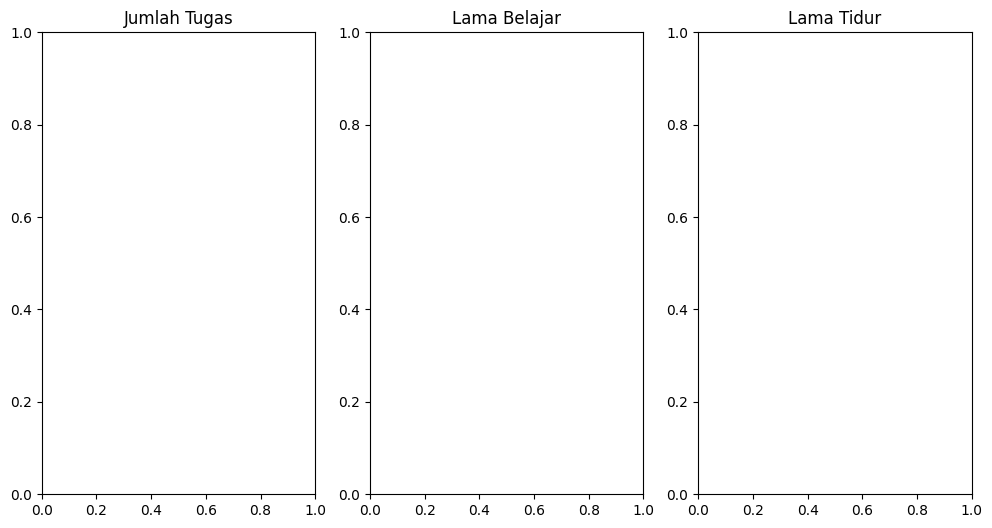

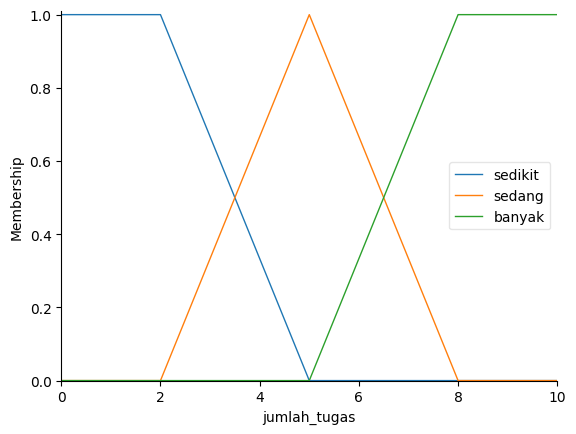

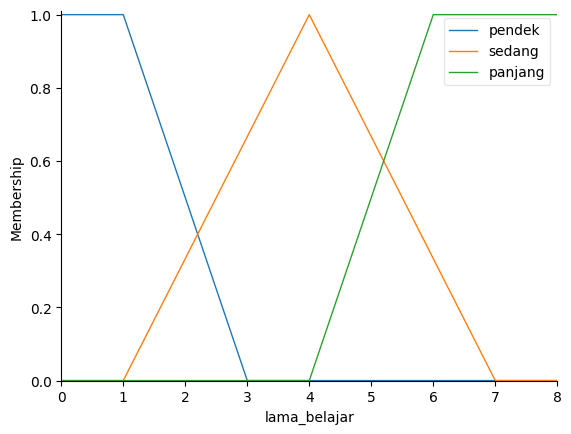

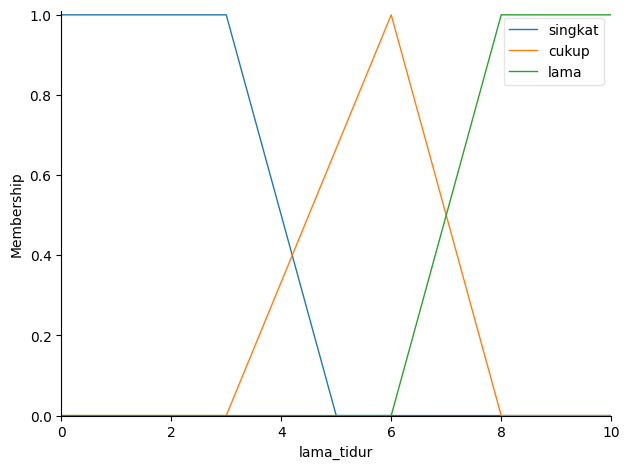

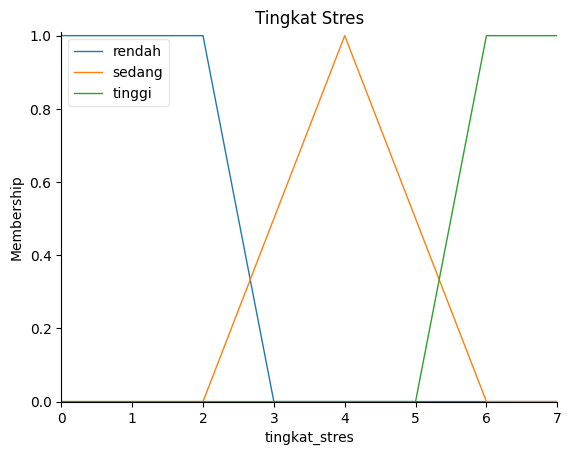

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definisi variabel fuzzy
jumlah_tugas = ctrl.Antecedent(np.arange(0, 11, 1), 'jumlah_tugas')
lama_belajar = ctrl.Antecedent(np.arange(0, 9, 1), 'lama_belajar')
lama_tidur = ctrl.Antecedent(np.arange(0, 11, 1), 'lama_tidur')
tingkat_stres = ctrl.Consequent(np.arange(0, 8, 1), 'tingkat_stres')

# Fungsi keanggotaan
jumlah_tugas['sedikit'] = fuzz.trapmf(jumlah_tugas.universe, [0, 0, 2, 5])
jumlah_tugas['sedang'] = fuzz.trimf(jumlah_tugas.universe, [2, 5, 8])
jumlah_tugas['banyak'] = fuzz.trapmf(jumlah_tugas.universe, [5, 8, 10, 10])

lama_belajar['pendek'] = fuzz.trapmf(lama_belajar.universe, [0, 0, 1, 3])
lama_belajar['sedang'] = fuzz.trimf(lama_belajar.universe, [1, 4, 7])
lama_belajar['panjang'] = fuzz.trapmf(lama_belajar.universe, [4, 6, 8, 8])

lama_tidur['singkat'] = fuzz.trapmf(lama_tidur.universe, [0, 0, 3, 5])
lama_tidur['cukup'] = fuzz.trimf(lama_tidur.universe, [3, 6, 8])
lama_tidur['lama'] = fuzz.trapmf(lama_tidur.universe, [6, 8, 10, 10])

tingkat_stres['rendah'] = fuzz.trapmf(tingkat_stres.universe, [0, 0, 2, 3])
tingkat_stres['sedang'] = fuzz.trimf(tingkat_stres.universe, [2, 4, 6])
tingkat_stres['tinggi'] = fuzz.trapmf(tingkat_stres.universe, [5, 6, 7, 7])

# Definisi aturan fuzzy
rules = [
    # Aturan untuk jumlah tugas sedikit
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['pendek'] & lama_tidur['singkat'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['pendek'] & lama_tidur['cukup'], tingkat_stres['rendah']),
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['pendek'] & lama_tidur['lama'], tingkat_stres['rendah']),
    
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['sedang'] & lama_tidur['singkat'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['sedang'] & lama_tidur['cukup'], tingkat_stres['rendah']),
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['sedang'] & lama_tidur['lama'], tingkat_stres['rendah']),
    
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['panjang'] & lama_tidur['singkat'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['panjang'] & lama_tidur['cukup'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedikit'] & lama_belajar['panjang'] & lama_tidur['lama'], tingkat_stres['rendah']),
    
    # Aturan untuk jumlah tugas sedang
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['pendek'] & lama_tidur['singkat'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['pendek'] & lama_tidur['cukup'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['pendek'] & lama_tidur['lama'], tingkat_stres['rendah']),
    
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['sedang'] & lama_tidur['singkat'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['sedang'] & lama_tidur['cukup'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['sedang'] & lama_tidur['lama'], tingkat_stres['rendah']),
    
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['panjang'] & lama_tidur['singkat'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['panjang'] & lama_tidur['cukup'], tingkat_stres['sedang']),
    ctrl.Rule(jumlah_tugas['sedang'] & lama_belajar['panjang'] & lama_tidur['lama'], tingkat_stres['sedang']),
    
    # Aturan untuk jumlah tugas banyak
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['pendek'] & lama_tidur['singkat'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['pendek'] & lama_tidur['cukup'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['pendek'] & lama_tidur['lama'], tingkat_stres['sedang']),
    
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['sedang'] & lama_tidur['singkat'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['sedang'] & lama_tidur['cukup'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['sedang'] & lama_tidur['lama'], tingkat_stres['sedang']),
    
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['panjang'] & lama_tidur['singkat'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['panjang'] & lama_tidur['cukup'], tingkat_stres['tinggi']),
    ctrl.Rule(jumlah_tugas['banyak'] & lama_belajar['panjang'] & lama_tidur['lama'], tingkat_stres['sedang']),
]

# Sistem kontrol fuzzy
stres_ctrl = ctrl.ControlSystem(rules)
stres = ctrl.ControlSystemSimulation(stres_ctrl)

# Input data dari pengguna
jumlah_tugas_input = int(input("Masukkan jumlah tugas (0-10): "))
lama_belajar_input = int(input("Masukkan lama belajar (0-8 jam): "))
lama_tidur_input = int(input("Masukkan lama tidur (0-10 jam): "))

# Masukkan input ke sistem kontrol
stres.input['jumlah_tugas'] = jumlah_tugas_input
stres.input['lama_belajar'] = lama_belajar_input
stres.input['lama_tidur'] = lama_tidur_input

# Komputasi
stres.compute()

# Output hasil
tingkat_stres_value = stres.output['tingkat_stres']
print(f"\nTingkat Stres: {tingkat_stres_value:.2f} (dalam skala 0-7)")

# Menampilkan deskripsi tingkat stres
if tingkat_stres_value <= 2:
    print("Tingkat stres: Rendah")
elif tingkat_stres_value <= 4:
    print("Tingkat stres: Sedang")
else:
    print("Tingkat stres: Tinggi")

# Informasi pembuat
print("\nDibuat oleh: Rendy Dwi Putra Setiadi")
print("NIM: 221011402561")

# Plot fungsi keanggotaan jumlah tugas
jumlah_tugas.view(ax=ax1)
ax1.set_title("Jumlah Tugas")

# Plot fungsi keanggotaan lama belajar
lama_belajar.view(ax=ax2)
ax2.set_title("Lama Belajar")

# Plot fungsi keanggotaan lama tidur
lama_tidur.view(ax=ax3)
ax3.set_title("Lama Tidur")

plt.tight_layout()
plt.show()

# Plot output tingkat stres
tingkat_stres.view()
plt.title("Tingkat Stres")
plt.show()
